## Objective

Inspired by having an experience playing Cookie Cats, as well as another notebook on Kaggle and the given dataset, I will 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# load the cookie_cats data
df = pd.read_csv('cookie_cats.csv')

In [3]:
df_copy = df.copy()
df_copy.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### Dataset explanation

<code>retention_1</code>: does the player come back and play 1 day after installing?
<br></br>
<code>retention_7</code>: does the player come back and play 7 days after installing?

From looking at the dataset, I suspected that the higher the number of gamerounds, the more likely they will not come back to play the game. It's possible that the game is no longer interesting the more they play. Our goal is to improve the game in the longer run.

In [4]:
# exploring dataset

# check if all the userid are unique
print(len(df_copy))
print(len(df_copy['userid'].unique()))

90189
90189


every userid is unique

In [5]:
# check if any column has NaN values
for col in df_copy.columns:
    print(f"Number of NaN values in {col}: {df_copy[col].isna().sum()}")

Number of NaN values in userid: 0
Number of NaN values in version: 0
Number of NaN values in sum_gamerounds: 0
Number of NaN values in retention_1: 0
Number of NaN values in retention_7: 0


There's no NaN value in the whole dataset, now we can proceed describing the distribution of each feature

In [6]:
# check the number of unique values in each feature
for col in df_copy.columns:
    print(f"Number of unique values in {col}: {len(df_copy[col].unique())}")

Number of unique values in userid: 90189
Number of unique values in version: 2
Number of unique values in sum_gamerounds: 942
Number of unique values in retention_1: 2
Number of unique values in retention_7: 2


so version column is binary, sum_gamerounds column is categorical, retention_1 and retention_7 columns are binary as well

In [7]:
# explore the distribution of features that are categorical

# sum_gamerounds
df_copy.describe([.25, .5, .75])[["sum_gamerounds"]]

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


In [8]:
df_copy.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0,52.456264,256.716423,49854
gate_40,45489,16.0,51.298776,103.294416,2640


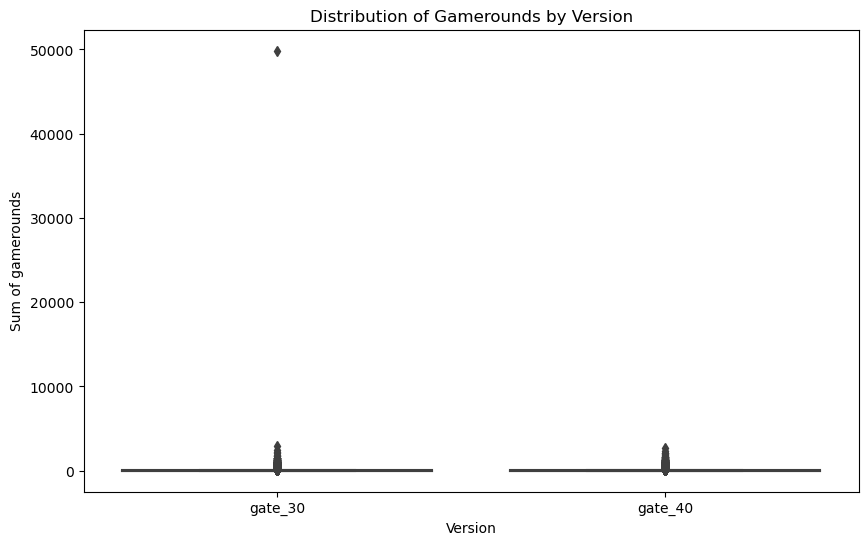

In [9]:
# box plot for the distribution of number of gamerounds for each gate level
plt.figure(figsize=(10, 6))
sns.boxplot(x='version', y='sum_gamerounds', data=df_copy)
plt.title('Distribution of Gamerounds by Version')
plt.ylabel('Sum of gamerounds')
plt.xlabel('Version')
plt.show()

There's an extreme outlier in the gamerounds for Gate 30 players. Let's see if our suspicion above is correct.

In [16]:
df_copy.loc[df_copy['sum_gamerounds'].idxmax()]

userid            6390605
version           gate_30
sum_gamerounds      49854
retention_1         False
retention_7          True
Name: 57702, dtype: object

Our suspicion was right in this case. After 1 day, this user still comes back and plays Cookie Cat. However, after playing a lot more gamerounds, this user decides not to go back and play this game.

In [19]:
# want to check the players with the second highest number of gamerounds
top_2_player = df_copy['sum_gamerounds'].nlargest(2)
second_largest_i = top_2_player.index[2-1]

# get the player with the 2nd highest number of gamerounds
df_copy.loc[second_largest_i]

userid             871500
version           gate_30
sum_gamerounds       2961
retention_1          True
retention_7          True
Name: 7912, dtype: object

As the player with 2nd highest number of gamerounds has only been playing 2961 rounds, we should set a threshold of around 5000 that if anybody plays more than that, remove them from our dataset.

In [21]:
# remove this extreme outlier to prepare for distribution visualization
df_copy.drop(df_copy[df_copy['sum_gamerounds'] >= 5000].index, inplace=True)
df_copy = df_copy.reset_index(drop=True)

Now, as an avid statistics student, I'd like to visualize the distribution of the gamerounds for each type of Gate players.

Text(0.5, 1.0, 'Distribution of gamerounds by version (Gate)')

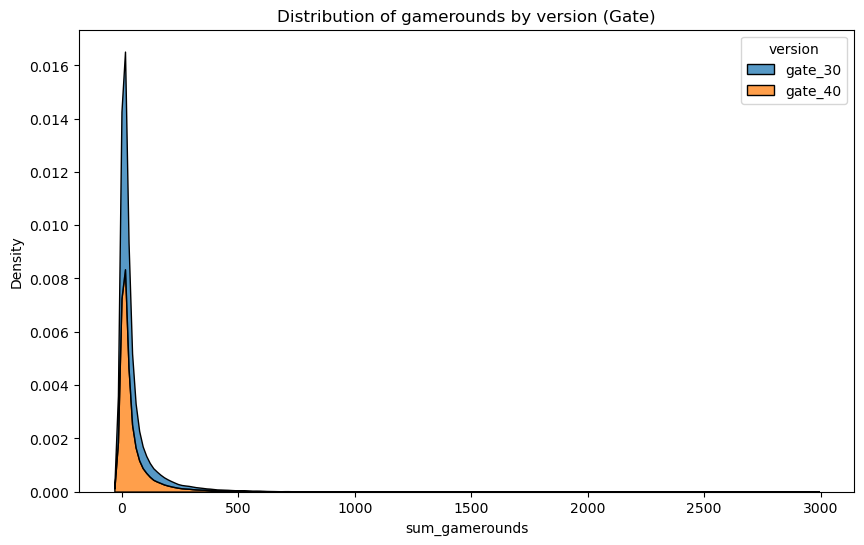

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_copy, x="sum_gamerounds", hue="version", multiple="stack", palette="tab10")
plt.title("Distribution of gamerounds by version (Gate)")

After removing the extreme outlier player, our distribution is still very right skewed. Again, as a statistics student, I'd like to quantify this skewness.

In [26]:
print(f"Skewness: {df_copy['sum_gamerounds'].skew()}")

Skewness: 5.9544200358182895


In [10]:
# from scipy import stats

In [11]:
# z_scores = np.abs(stats.zscore(df_copy.select_dtypes(include=[np.number])))